## Import Depencies and read in the meta data

In [1]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import gradio as gr
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime

In [2]:
# Clear any logs from previous runs
rm -rf ./logs/

SyntaxError: invalid syntax (335981479.py, line 2)

In [3]:
df_weapons = pd.read_csv('../Resources/metadata.csv')
df_weapons

,imagefile,labelfile,target,train_id
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1
4,Automatic Rifle_13.jpeg,Automatic Rifle_13.txt,0,0
...,...,...,...,...
709,Sword_95.jpeg,Sword_95.txt,8,1
710,Sword_96.jpeg,Sword_96.txt,8,0
711,Sword_97.jpeg,Sword_97.txt,8,1
712,Sword_98.jpeg,Sword_98.txt,8,1


In [4]:
# Split .txt and number
df_weapons[['Class', 'weapon_id']] = df_weapons['labelfile']\
                                            .str.replace('.txt', '', regex=False)\
                                            .str.split('_', expand=True)
# Drop initial column 
len(df_weapons),df_weapons.head()


(714,
                   imagefile                labelfile  target  train_id  \
 0   Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1  Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2   Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3   Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4   Automatic Rifle_13.jpeg   Automatic Rifle_13.txt       0         0   
 
              Class weapon_id  
 0  Automatic Rifle        10  
 1  Automatic Rifle       100  
 2  Automatic Rifle        11  
 3  Automatic Rifle        12  
 4  Automatic Rifle        13  )

In [5]:
# Build a list of imported images
base_path = "../Resources/weapon_detection/train/images/"
images_weapons = []

for df_split in range(len(df_weapons)):
    filename = df_weapons.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_weapons)}: Attempting to import {filename}')
    try:
        images_weapons.append(Image.open(path).convert('RGB'))
    except:
        print(f'FAILED: {filename}')

        
len(df_weapons),len(images_weapons),images_weapons

0 of 714: Attempting to import Automatic Rifle_10.jpeg
1 of 714: Attempting to import Automatic Rifle_100.jpeg
2 of 714: Attempting to import Automatic Rifle_11.jpeg
3 of 714: Attempting to import Automatic Rifle_12.jpeg
4 of 714: Attempting to import Automatic Rifle_13.jpeg
FAILED: Automatic Rifle_13.jpeg
5 of 714: Attempting to import Automatic Rifle_14.jpeg
6 of 714: Attempting to import Automatic Rifle_15.png
7 of 714: Attempting to import Automatic Rifle_16.png
8 of 714: Attempting to import Automatic Rifle_17.jpeg
9 of 714: Attempting to import Automatic Rifle_18.png
10 of 714: Attempting to import Automatic Rifle_19.jpeg
FAILED: Automatic Rifle_19.jpeg
11 of 714: Attempting to import Automatic Rifle_20.jpeg
12 of 714: Attempting to import Automatic Rifle_21.jpeg
13 of 714: Attempting to import Automatic Rifle_22.jpeg
14 of 714: Attempting to import Automatic Rifle_23.jpeg
15 of 714: Attempting to import Automatic Rifle_24.jpeg
16 of 714: Attempting to import Automatic Rifle_25.j

c:\Users\nick\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


114 of 714: Attempting to import Bazooka_66.jpeg
115 of 714: Attempting to import Bazooka_67.jpeg
116 of 714: Attempting to import Bazooka_68.jpeg
117 of 714: Attempting to import Bazooka_69.jpeg
118 of 714: Attempting to import Bazooka_7.jpeg
119 of 714: Attempting to import Bazooka_70.jpeg
FAILED: Bazooka_70.jpeg
120 of 714: Attempting to import Bazooka_71.jpeg
FAILED: Bazooka_71.jpeg
121 of 714: Attempting to import Bazooka_72.jpeg
FAILED: Bazooka_72.jpeg
122 of 714: Attempting to import Bazooka_73.jpeg
123 of 714: Attempting to import Bazooka_74.jpeg
FAILED: Bazooka_74.jpeg
124 of 714: Attempting to import Bazooka_75.png
125 of 714: Attempting to import Bazooka_76.png
FAILED: Bazooka_76.png
126 of 714: Attempting to import Bazooka_77.jpeg
127 of 714: Attempting to import Bazooka_78.jpeg
FAILED: Bazooka_78.jpeg
128 of 714: Attempting to import Bazooka_79.jpeg
129 of 714: Attempting to import Bazooka_8.jpeg
130 of 714: Attempting to import Bazooka_80.jpeg
131 of 714: Attempting to im

(714,
 571,
 [<PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=1000x750>,
  <PIL.Image.Image image mode=RGB size=1920x1080>,
  <PIL.Image.Image image mode=RGB size=750x450>,
  <PIL.Image.Image image mode=RGB size=1280x720>,
  <PIL.Image.Image image mode=RGB size=512x512>,
  <PIL.Image.Image image mode=RGB size=2500x980>,
  <PIL.Image.Image image mode=RGB size=1751x1110>,
  <PIL.Image.Image image mode=RGB size=900x356>,
  <PIL.Image.Image image mode=RGB size=1280x946>,
  <PIL.Image.Image image mode=RGB size=550x240>,
  <PIL.Image.Image image mode=RGB size=768x439>,
  <PIL.Image.Image image mode=RGB size=547x280>,
  <PIL.Image.Image image mode=RGB size=800x600>,
  <PIL.Image.Image image mode=RGB size=480x360>,
  <PIL.Image.Image image mode=RGB size=774x1080>,
  <PIL.Image.Image image mode=RGB size=907x382>,
  <PIL.Image.Image image mode=RGB size=1200x671>,
  <PIL.Image.Image image mode=RGB size=493x450>,
  <PIL.Image.Image image mode=RGB size=480x360

In [6]:
# Remove files without images
df_weapons = df_weapons.loc[df_weapons['train_id'] != 0]
df_weapons = df_weapons.reset_index()
df_weapons = df_weapons.drop('index',axis=1)
df_weapons,len(images_weapons)

(                    imagefile                labelfile  target  train_id  \
 0     Automatic Rifle_10.jpeg   Automatic Rifle_10.txt       0         1   
 1    Automatic Rifle_100.jpeg  Automatic Rifle_100.txt       0         1   
 2     Automatic Rifle_11.jpeg   Automatic Rifle_11.txt       0         1   
 3     Automatic Rifle_12.jpeg   Automatic Rifle_12.txt       0         1   
 4     Automatic Rifle_14.jpeg   Automatic Rifle_14.txt       0         1   
 ..                        ...                      ...     ...       ...   
 566             Sword_93.jpeg             Sword_93.txt       8         1   
 567             Sword_94.jpeg             Sword_94.txt       8         1   
 568             Sword_95.jpeg             Sword_95.txt       8         1   
 569             Sword_97.jpeg             Sword_97.txt       8         1   
 570             Sword_98.jpeg             Sword_98.txt       8         1   
 
                Class weapon_id  
 0    Automatic Rifle        10  
 1    

In [7]:
df_weapons['general'] = 1
df_weapons


,imagefile,labelfile,target,train_id,Class,weapon_id,general
0,Automatic Rifle_10.jpeg,Automatic Rifle_10.txt,0,1,Automatic Rifle,10,1
1,Automatic Rifle_100.jpeg,Automatic Rifle_100.txt,0,1,Automatic Rifle,100,1
2,Automatic Rifle_11.jpeg,Automatic Rifle_11.txt,0,1,Automatic Rifle,11,1
3,Automatic Rifle_12.jpeg,Automatic Rifle_12.txt,0,1,Automatic Rifle,12,1
4,Automatic Rifle_14.jpeg,Automatic Rifle_14.txt,0,1,Automatic Rifle,14,1
...,...,...,...,...,...,...,...
566,Sword_93.jpeg,Sword_93.txt,8,1,Sword,93,1
567,Sword_94.jpeg,Sword_94.txt,8,1,Sword,94,1
568,Sword_95.jpeg,Sword_95.txt,8,1,Sword,95,1
569,Sword_97.jpeg,Sword_97.txt,8,1,Sword,97,1


In [8]:
# Reading the meta file containing all image file names
df_general = pd.read_csv("../Resources/dataset/train.csv")
df_general

,Image,Class
0,image537.jpeg,Airplane
1,image481.jpeg,Miscellaneous
2,image232.jpeg,Miscellaneous
3,image371.jpeg,Miscellaneous
4,image128.jpeg,Snowman
...,...,...
363,image551.jpeg,Miscellaneous
364,image478.jpeg,Miscellaneous
365,image314.jpeg,Miscellaneous
366,image221.jpeg,Jacket


In [9]:
df_general[['type', 'file']] = df_general['Image'].str.split('image', n=1, expand=True)
df_general = df_general[['Image','Class','file']]
df_general


,Image,Class,file
0,image537.jpeg,Airplane,537.jpeg
1,image481.jpeg,Miscellaneous,481.jpeg
2,image232.jpeg,Miscellaneous,232.jpeg
3,image371.jpeg,Miscellaneous,371.jpeg
4,image128.jpeg,Snowman,128.jpeg
...,...,...,...
363,image551.jpeg,Miscellaneous,551.jpeg
364,image478.jpeg,Miscellaneous,478.jpeg
365,image314.jpeg,Miscellaneous,314.jpeg
366,image221.jpeg,Jacket,221.jpeg


In [10]:
df_general[['number', 'delete']] = df_general['file'].str.split('.', n=1, expand=True)
#df_general = df_general.set_index(['number'])
df_general = df_general.sort_index(ascending=True)
df_general

,Image,Class,file,number,delete
0,image537.jpeg,Airplane,537.jpeg,537,jpeg
1,image481.jpeg,Miscellaneous,481.jpeg,481,jpeg
2,image232.jpeg,Miscellaneous,232.jpeg,232,jpeg
3,image371.jpeg,Miscellaneous,371.jpeg,371,jpeg
4,image128.jpeg,Snowman,128.jpeg,128,jpeg
...,...,...,...,...,...
363,image551.jpeg,Miscellaneous,551.jpeg,551,jpeg
364,image478.jpeg,Miscellaneous,478.jpeg,478,jpeg
365,image314.jpeg,Miscellaneous,314.jpeg,314,jpeg
366,image221.jpeg,Jacket,221.jpeg,221,jpeg


In [11]:
# Build a list of imported images
base_path = "../Resources/dataset/train/"
images_general = []

for df_split in range(len(df_general)):
    filename = df_general.iloc[df_split,0]
    path = base_path + filename
    print(f'{df_split} of {len(df_general)}: Attempting to import {filename}')
    try:
        images_general.append(Image.open(path).convert('RGB'))
        
    except:
        print(f'FAILED: {filename}')

        
len(images_general),images_general

0 of 368: Attempting to import image537.jpeg
1 of 368: Attempting to import image481.jpeg
2 of 368: Attempting to import image232.jpeg
3 of 368: Attempting to import image371.jpeg
4 of 368: Attempting to import image128.jpeg
5 of 368: Attempting to import image336.jpeg
6 of 368: Attempting to import image542.jpeg
7 of 368: Attempting to import image77.jpeg
8 of 368: Attempting to import image510.jpeg
9 of 368: Attempting to import image158.jpeg
10 of 368: Attempting to import image17.jpeg
11 of 368: Attempting to import image200.jpeg
12 of 368: Attempting to import image421.jpeg
13 of 368: Attempting to import image451.jpeg
14 of 368: Attempting to import image344.jpeg
15 of 368: Attempting to import image334.jpeg
16 of 368: Attempting to import image516.jpeg
17 of 368: Attempting to import image3.jpeg
18 of 368: Attempting to import image376.jpeg
19 of 368: Attempting to import image135.jpeg
20 of 368: Attempting to import image156.jpeg
21 of 368: Attempting to import image434.jpeg
22

(368,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x73>,
  <PIL.Image.Image image mode=RGB size=80x52>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x111>,
  <PIL.Image.Image image mode=RGB size=80x110>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x38>,
  <PIL.Image.Image image mode=RGB size=80x62>,
  <PIL.Image.Image image mode=RGB size=80x60>

In [12]:
df_general['general'] = 0
df_general

,Image,Class,file,number,delete,general
0,image537.jpeg,Airplane,537.jpeg,537,jpeg,0
1,image481.jpeg,Miscellaneous,481.jpeg,481,jpeg,0
2,image232.jpeg,Miscellaneous,232.jpeg,232,jpeg,0
3,image371.jpeg,Miscellaneous,371.jpeg,371,jpeg,0
4,image128.jpeg,Snowman,128.jpeg,128,jpeg,0
...,...,...,...,...,...,...
363,image551.jpeg,Miscellaneous,551.jpeg,551,jpeg,0
364,image478.jpeg,Miscellaneous,478.jpeg,478,jpeg,0
365,image314.jpeg,Miscellaneous,314.jpeg,314,jpeg,0
366,image221.jpeg,Jacket,221.jpeg,221,jpeg,0


In [13]:
images = images_general + images_weapons
len(images),images

(939,
 [<PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x119>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x60>,
  <PIL.Image.Image image mode=RGB size=80x107>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x73>,
  <PIL.Image.Image image mode=RGB size=80x52>,
  <PIL.Image.Image image mode=RGB size=80x120>,
  <PIL.Image.Image image mode=RGB size=80x53>,
  <PIL.Image.Image image mode=RGB size=80x111>,
  <PIL.Image.Image image mode=RGB size=80x110>,
  <PIL.Image.Image image mode=RGB size=80x63>,
  <PIL.Image.Image image mode=RGB size=80x38>,
  <PIL.Image.Image image mode=RGB size=80x62>,
  <PIL.Image.Image image mode=RGB size=80x60>

In [14]:
df_weapons['Image'] = df_weapons['imagefile']
df = df_weapons[['Image','general']]
df

,Image,general
0,Automatic Rifle_10.jpeg,1
1,Automatic Rifle_100.jpeg,1
2,Automatic Rifle_11.jpeg,1
3,Automatic Rifle_12.jpeg,1
4,Automatic Rifle_14.jpeg,1
...,...,...
566,Sword_93.jpeg,1
567,Sword_94.jpeg,1
568,Sword_95.jpeg,1
569,Sword_97.jpeg,1


In [15]:
df_general = df_general[['Image','general']]
df_general

,Image,general
0,image537.jpeg,0
1,image481.jpeg,0
2,image232.jpeg,0
3,image371.jpeg,0
4,image128.jpeg,0
...,...,...
363,image551.jpeg,0
364,image478.jpeg,0
365,image314.jpeg,0
366,image221.jpeg,0


In [16]:
df = pd.concat([df,df_general]).reset_index()
df

,index,Image,general
0,0,Automatic Rifle_10.jpeg,1
1,1,Automatic Rifle_100.jpeg,1
2,2,Automatic Rifle_11.jpeg,1
3,3,Automatic Rifle_12.jpeg,1
4,4,Automatic Rifle_14.jpeg,1
...,...,...,...
934,363,image551.jpeg,0
935,364,image478.jpeg,0
936,365,image314.jpeg,0
937,366,image221.jpeg,0


## Pre-process images to prep for splitting into training and testing data

In [17]:
# Check all the sizes into a list, then convert to a set
sizes = set([img.size for img in images])
sizes



{(80, 36),
 (80, 38),
 (80, 39),
 (80, 44),
 (80, 45),
 (80, 48),
 (80, 49),
 (80, 50),
 (80, 51),
 (80, 52),
 (80, 53),
 (80, 54),
 (80, 56),
 (80, 57),
 (80, 58),
 (80, 59),
 (80, 60),
 (80, 61),
 (80, 62),
 (80, 63),
 (80, 64),
 (80, 68),
 (80, 71),
 (80, 73),
 (80, 76),
 (80, 77),
 (80, 78),
 (80, 80),
 (80, 83),
 (80, 96),
 (80, 98),
 (80, 100),
 (80, 102),
 (80, 103),
 (80, 107),
 (80, 108),
 (80, 109),
 (80, 110),
 (80, 111),
 (80, 112),
 (80, 119),
 (80, 120),
 (80, 121),
 (80, 123),
 (80, 126),
 (80, 128),
 (80, 130),
 (80, 134),
 (80, 142),
 (220, 140),
 (250, 200),
 (260, 280),
 (270, 323),
 (275, 275),
 (283, 879),
 (295, 280),
 (300, 200),
 (315, 681),
 (320, 320),
 (334, 500),
 (348, 210),
 (351, 500),
 (354, 500),
 (355, 239),
 (355, 282),
 (355, 355),
 (364, 280),
 (389, 276),
 (390, 280),
 (400, 400),
 (416, 280),
 (420, 368),
 (425, 425),
 (433, 537),
 (440, 171),
 (440, 440),
 (448, 340),
 (462, 280),
 (463, 1800),
 (480, 360),
 (481, 280),
 (493, 450),
 (498, 500),


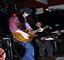

In [18]:
# Use a for loop to resize all images to 64 by 60
target_size = (64, 60)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]

resized_images[1]


In [19]:
# Check images resizing
sizes = set([img.size for img in resized_images])
sizes

{(64, 60)}

In [20]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]

#print(float_images.shape)
print(float_images[0])


[[[187. 182. 179.]
  [185. 180. 177.]
  [183. 178. 175.]
  ...
  [158. 156. 157.]
  [160. 158. 159.]
  [159. 157. 158.]]

 [[186. 181. 178.]
  [184. 179. 176.]
  [184. 179. 176.]
  ...
  [158. 156. 157.]
  [157. 155. 156.]
  [155. 153. 154.]]

 [[183. 178. 175.]
  [182. 177. 174.]
  [183. 177. 175.]
  ...
  [153. 151. 152.]
  [150. 148. 150.]
  [148. 146. 148.]]

 ...

 [[106. 101.  98.]
  [108. 103. 100.]
  [106. 101.  98.]
  ...
  [ 85.  81.  78.]
  [ 86.  82.  79.]
  [ 86.  82.  79.]]

 [[103.  98.  95.]
  [105. 100.  97.]
  [103.  98.  95.]
  ...
  [ 96.  92.  89.]
  [ 94.  90.  87.]
  [ 93.  89.  86.]]

 [[ 94.  89.  86.]
  [ 96.  91.  88.]
  [ 95.  90.  87.]
  ...
  [106. 102.  99.]
  [102.  98.  95.]
  [ 97.  93.  90.]]]


In [21]:
# normalize images to a range between 0 and 1 by
# dividing all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values 
print("Pixel Values:")
print(normalized_images[0].shape)
print(normalized_images[0])


Pixel Values:
(60, 64, 3)
[[[0.73333335 0.7137255  0.7019608 ]
  [0.7254902  0.7058824  0.69411767]
  [0.7176471  0.69803923 0.6862745 ]
  ...
  [0.61960787 0.6117647  0.6156863 ]
  [0.627451   0.61960787 0.62352943]
  [0.62352943 0.6156863  0.61960787]]

 [[0.7294118  0.70980394 0.69803923]
  [0.72156864 0.7019608  0.6901961 ]
  [0.72156864 0.7019608  0.6901961 ]
  ...
  [0.61960787 0.6117647  0.6156863 ]
  [0.6156863  0.60784316 0.6117647 ]
  [0.60784316 0.6        0.6039216 ]]

 [[0.7176471  0.69803923 0.6862745 ]
  [0.7137255  0.69411767 0.68235296]
  [0.7176471  0.69411767 0.6862745 ]
  ...
  [0.6        0.5921569  0.59607846]
  [0.5882353  0.5803922  0.5882353 ]
  [0.5803922  0.57254905 0.5803922 ]]

 ...

 [[0.41568628 0.39607844 0.38431373]
  [0.42352942 0.40392157 0.39215687]
  [0.41568628 0.39607844 0.38431373]
  ...
  [0.33333334 0.31764707 0.30588236]
  [0.3372549  0.32156864 0.30980393]
  [0.3372549  0.32156864 0.30980393]]

 [[0.40392157 0.38431373 0.37254903]
  [0.411764

In [22]:
# Set X and y values
X = normalized_images
y = df['general']
# Check value lengths for X and y variables
X[0].shape

(60, 64, 3)

In [23]:
# Convert values to numpy arrays
y = np.array(y).reshape(-1,1)
X = np.array(X)

In [24]:
y.shape

(939, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Augment to get more samples

In [26]:
# Apply augmentation to the whole training dataset
# Define the augmentation pipeline
augmentation_model = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomZoom(0.2),            
    tf.keras.layers.RandomFlip('horizontal')     
])


In [27]:

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    ## Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  

    
    # Add 5 images for every original image
    for j in range(50):
        # Append a new image to the X list
        X_train_aug.append(augmentation_model(img, training=True)[0].numpy())
        #print(X_train_aug[0].shape)
        
        # Append the label for the original image to the y list
        y_train_aug.append(label)
        #print(y_train_aug[0].shape)
# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))
X_train_aug[0].shape,y_train_aug[0].shape

35200
35200


((60, 64, 3), (1,))

In [28]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
X_test_np[0].shape,len(X_test_np)

((60, 64, 3), 235)

In [29]:
## One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))
y_train_aug_enc,y_test_enc

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 

In [30]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test_np)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug, test_size=0.2, random_state=42)

# Print the total number of one_hot_encoded columns
len(y_train),len(X_train)

(28160, 28160)

In [31]:
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train).reshape(-1, 1))
y_train = y_encoder.transform(np.array(y_train).reshape(-1, 1))
y_val = y_encoder.transform(np.array(y_val).reshape(-1, 1))
len(y_train),len(y_val)

(28160, 7040)

## Create a CNN model

In [32]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(60, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(90, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(36, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='sigmoid') 
])


In [33]:

# Compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [35]:

# Train the model
batch_size = 1500
epochs = 4
history = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_val,y_val),
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/4
880/880 [==============================] - 280s 317ms/step - loss: 0.6485 - accuracy: 0.6077 - val_loss: 0.6309 - val_accuracy: 0.6354
Epoch 2/4
880/880 [==============================] - 292s 332ms/step - loss: 0.5973 - accuracy: 0.6620 - val_loss: 0.5639 - val_accuracy: 0.6973
Epoch 3/4
880/880 [==============================] - 452s 514ms/step - loss: 0.5421 - accuracy: 0.7112 - val_loss: 0.5391 - val_accuracy: 0.7057
Epoch 4/4
880/880 [==============================] - 449s 511ms/step - loss: 0.4875 - accuracy: 0.7536 - val_loss: 0.4638 - val_accuracy: 0.7614


In [40]:
tensor_ui = %tensorboard --logdir logs/fit
tensor_ui

Reusing TensorBoard on port 6006 (pid 53696), started 0:48:05 ago. (Use '!kill 53696' to kill it.)

In [46]:
# Evaluate the model using the testing data
results = model.evaluate(X_test_np, y_test_np)
results


8/8 [==============================] - 1s 115ms/step - loss: 1.5814 - accuracy: 0.7234


[1.5813641548156738, 0.7234042286872864]

In [47]:
import pickle
# save the classification model as a pickle file
model_pkl = "../models/second_binary_model.pkl"  

with open(model_pkl, 'wb') as file:  
    pickle.dump(model, file)